## Tensorflow(gpu) installation
    must use following version, others can fail.
    install python 3.9, add to path. install cuda 11.2, add to path (libnvvp, bin). 
    unpack cudnn 8.1 to cuda folder. nvcc -V check installed correctly. pip install tensorflow==2.10
    python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
    verify installed correctly
    tensorflow each version directory structure change a lot, search in package for function name directly
    if can't import from online import statement

## Deep learning
    Deep learning is an approach to machine learning characterized by deep stacks of computations. Through 
    their power and scalability neural networks have become the defining model of deep learning. Neural 
    networks are composed of neurons, where each neuron individually performs only a simple computation. 

    Neuron: fundamental component of a neural network. This neuron's activation is y = w * x + b.
        The input is x. Its connection to the neuron has a weight which is w. Whenever a value flows through
        a connection, you multiply the value by the connection's weight. A neural network "learns" by 
        modifying its weights. The b is a special kind of weight we call the bias. The y is the value the 
        neuron ultimately outputs. Single neuron models are linear models. A linear unit with two inputs 
        will fit a plane, and a unit with more inputs than that will fit a hyperplane.
    Layer: Neural networks typically organize their neurons into layers. When we collect together linear 
        units having a common set of inputs we get a dense layer.
        Each layer in a neural network as performing some kind of relatively simple data transformation. 
        Through deep stack of layers, neural network can transform its inputs in more and more complex ways.
    Activation function: some function we apply to each of a layer's outputs (its activations) to provide
        nonlinearity. Two dense layers with nothing in between are no better than a single dense layer by 
        itself. 
        The most common is the rectifier function  max(0,x). Attach the rectifier to a linear unit, we get 
        a rectified linear unit or ReLU.
    Fully-connected(neural) network: stacking multiple dense layers. layers between the input and output
        layer are called hidden layers, since we never see their outputs directly. For regression problem, 
        final (output) layer is a linear unit (no activation function). Other tasks (like classification) 
        might require an activation function on the output. Neural networks tend to perform best when their 
        inputs are on a common scale
    Training model: All of the network's weights are initialized randomly.Each example in the training data 
        consists of some features (the inputs) together with an expected target (the output). Training the 
        network means adjusting its weights in such a way that it can transform the features into the target. 
        If we can successfully train a network to do that, its weights must represent in some way the 
        relationship between those features and that target as expressed in the training data. In addition 
        to the training data, we need loss function and optimizer.
    Loss function: measures disparity between the the target's true value and the value the model predicts.
        Different problems call for different loss functions. A common loss function for regression problems 
        is the mean absolute error (MAE: mean(abs(y_true - y_pred))), other loss function: mean-squared error 
        (MSE) or the Huber loss.
        During training, the model will use the loss function as a guide for finding the correct values of its 
        weights (lower loss is better). In other words, the loss function tells the network its objective.
    Metric: used to judge the performance of your model. This is only for you to look at and has nothing to do
        with the optimization process.
    Optimizer: is an algorithm that adjusts the weights to minimize the loss. Virtually all optimization 
        algorithms used in deep learning belong to a family called stochastic gradient descent(SGD). They are 
        iterative algorithms that train a network in steps. One step of training goes like this:
        1. Sample some training data and run it through the network to make predictions.
        2. Measure the loss between the predictions and the true values.
        3. Finally, adjust the weights in a direction that makes the loss smaller.
        Then just repeat until the loss is as small as you like (or until it won't decrease any further.)
        Each iteration's sample of training data is called a minibatch / batch, while a complete round of the 
        training data is called an epoch. 
        
        stochastic gradient descent(SGD): The gradient is a vector that tells us how to change the weights to 
            make the loss change fastest. It uses the gradient to descend the loss curve towards a minimum. 
            Stochastic because the minibatches are random samples from the dataset. 

        Learning rate: learning rate times gradient is the difference of weight changed each step.
        The learning rate and the size of the minibatches are the two parameters that have the largest effect 
        on how the SGD training proceeds (require hyperparameter tuning).
        Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable(great) for most 
        problems without any parameter tuning. 
    
    Underfitting and overfitting: the information in the training data as being of two kinds: signal and noise. 
        The signal is the part that generalizes, help model make predictions for new data. The noise is only true 
        for the training data. Model can learn more signal at the cost of learning more noise. The validation 
        loss will continue to decrease till cost exceeds the benefit.
        Underfitting the training set is when the loss is not as low as it could be because the model hasn't 
        learned enough signal. Overfitting the training set is when the loss is not as low as it could be because 
        the model learned too much noise. The trick to training deep learning models is finding the best balance 
        between the two.
    Capacity: A model's capacity  refers to the size and complexity of the patterns it is able to learn. For neural 
        networks, this determined by how many neurons and how they are connected together. If underfitting the 
        data, try increasing its capacity (making it wider (more units in layers) or deeper (more layers)).
        Wider networks prefer learning more linear relationships, while deeper networks prefer more nonlinear ones. 
    Early stopping: stop the training whenever it seems the validation loss isn't decreasing anymore. it can prevent 
        overfitting from training too long, can also prevent underfitting from not training long enough (set 
        training epochs to some large number)
    Dropout: randomly drop out some fraction of a layer's input units every step of training, making it much harder 
        for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, 
        general patterns, whose weight patterns tend to be more robust. Dropout creating a kind of ensemble of 
        networks. Higher drop percentage converge/train slower.
    Batch normalization: can help correct training that is slow or unstable, normalizing inside the network. A batch 
        normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and 
        standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. 
        Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs. Most often, batchnorm is added 
        as an aid to the optimization process, tend to need fewer epochs to complete training, also fix various 
        problems that can cause the training to get "stuck". 
    Layer overall ordering: CONV/FC -> BatchNorm -> ReLu(or other activation) -> (Maxpool for cnn) -> Dropout 
    Using both BatchNorm and Dropout might cause negative effect(lower accuracy & slower train), usually Dropout 
        outperform BatchNorm.

    Binary Classification: Classification into one of two classes is a common machine learning problem, need assign a 
        numeric class label
    Accuracy: is the ratio of correct predictions to total predictions (number_correct / total),  accuracy is a 
        reasonable metric to use whenever the classes in the dataset occur with about the same frequency.
    Cross-entropy:  is a sort of measure for the distance from one probability distribution to another, can take
        derivative for SGD. use cross-entropy for a classification loss, require probabilities as inputs (numbers from 
        0 to 1)
    Sigmoid activation: To covert the real-valued outputs produced by a dense layer into probabilities (0 to 1), with
        0.5 as the threshold probability for predicting class label 0 or 1


In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

Epoch 1/500
5/5 [==============================] - 1s 37ms/step - loss: 0.5077 - val_loss: 0.3885
Epoch 2/500
5/5 [==============================] - 0s 11ms/step - loss: 0.3183 - val_loss: 0.1914
Epoch 3/500
5/5 [==============================] - 0s 13ms/step - loss: 0.1704 - val_loss: 0.1407
Epoch 4/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1796 - val_loss: 0.1493
Epoch 5/500
5/5 [==============================] - 0s 20ms/step - loss: 0.1696 - val_loss: 0.1286
Epoch 6/500
5/5 [==============================] - 0s 14ms/step - loss: 0.1508 - val_loss: 0.1371
Epoch 7/500
5/5 [==============================] - 0s 14ms/step - loss: 0.1499 - val_loss: 0.1300
Epoch 8/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1424 - val_loss: 0.1190
Epoch 9/500
5/5 [==============================] - 0s 14ms/step - loss: 0.1376 - val_loss: 0.1167
Epoch 10/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1370 - val_loss: 0.1177
Epoch 11/500
5/5 [=

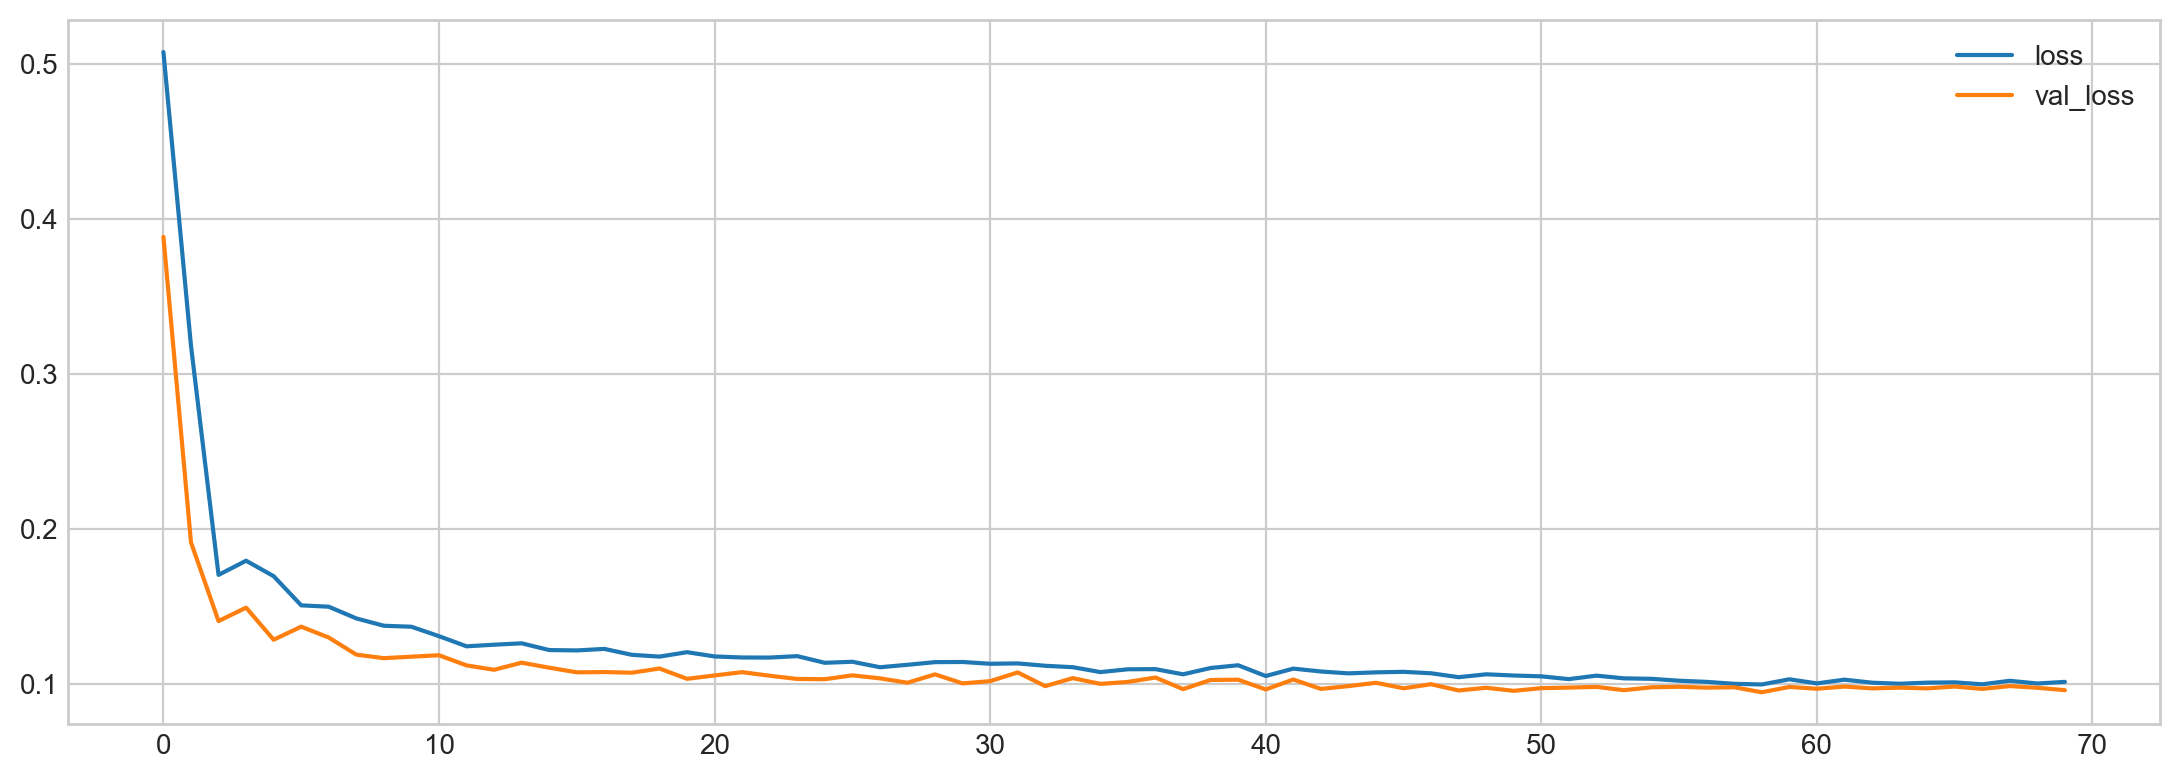

In [23]:
import scipy as scipy
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import EarlyStopping
import pandas as pd

red_wine = pd.read_csv('data/red-wine.csv')
df_train = red_wine.sample(frac=0.7, random_state=0)
# df_valid = red_wine.drop(df_train.index)
red_wine.drop(df_train.index, inplace=True)
df_valid = red_wine.sample(frac=0.5, random_state=0)
df_test = red_wine.drop(df_valid.index)


# Scale to [0, 1]
max_, min_= df_train.max(axis=0), df_train.min(axis=0)
df_train, df_valid, df_test = (df_train - min_) / (max_ - min_), (df_valid - min_) / (max_ - min_), (df_test - min_) / (max_ - min_)

# Split features and target
X_train, X_valid, X_test = df_train.drop('quality', axis=1), df_valid.drop('quality', axis=1), df_test.drop('quality', axis=1)
y_train, y_valid, y_test = df_train['quality'], df_valid['quality'], df_test['quality']

X_train=tf.convert_to_tensor(X_train)
X_valid=tf.convert_to_tensor(X_valid)
X_test=tf.convert_to_tensor(X_test)
y_train=tf.convert_to_tensor(y_train)
y_valid=tf.convert_to_tensor(y_valid)
y_test=tf.convert_to_tensor(y_test)

'''
# single neuron
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])      # one basic neuron with three inputs and one output
        # units: how many outputs we want, input_shape: the dimensions of the inputs
])
'''

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20,        # stop when 20 epochs less than 0.001 improvement
    restore_best_weights=True,
)

features= X_train.shape[1]
# deep neural network
model = keras.Sequential([

    layers.Dense(units=64, activation='relu', input_shape=[features]), # the hidden ReLU layers

    layers.Dense(units=64),
    #layers.BatchNormalization(),
    #layers.Dense(units=64, activation='relu'),  # activation: apply activation function to each neuron in one layer
    layers.ReLU(),
    layers.Dropout(rate=0.2), # apply 20% dropout to the previous layer

    #layers.BatchNormalization(),
    layers.Dense(units=64),
    layers.ReLU(),
    layers.Dropout(rate=0.2), # apply 30% dropout to the previous layer
    layers.Dense(units=1),  # the linear output layer
    # layers.Dense(1, activation='sigmoid')   # for binary classification
    # layers.Dense(10, activation=tf.nn.softmax)   # for 10 class classification
])

model.compile(optimizer="adam", loss="mae")   # add a loss function and optimizer for the model
# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'],)   # for binary classification
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])   # for multiclass classification
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256,
    epochs=500, callbacks=[early_stopping])   # verbose=0
history_df = pd.DataFrame(history.history)   # loss and val_loss
history_df.loc[:, ['loss', 'val_loss']].plot()
# history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()     # for binary classification accuracy
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print('eval',model.evaluate(X_test, y_test))    # get test set score

pred=model.predict(tf.reshape(X_test, (-1, 11)))
loss = tf.losses.mae(y_test, pred)
loss=tf.reduce_mean(tf.metrics.mean_absolute_error(y_test, pred))
print('manual loss', loss)



# convolutional neural networks
    convolutional neural networks：(convnet or CNN) Convolution is the mathematical operation that gives
    the layers of a convnet their unique structure.
    A convnet used for image classification consists of two parts: a convolutional base and a dense head.
        The base is used to extract the features(a line, a color, a texture, a shape, a pattern, some
        complicated combination.) from an image(mainly convolution layers). The head is used to determine
        the class of the image(mainly dense layer).
    Training the Classifier: The goal of training is to learn two things: which features to extract from
        an image (base), which class goes with what features (head). We reuse the base of a pretrained
        model(most commonly used is ImageNet), instead of train from scratch (reuse the part of a network
        that has already learned to extract features, and attach to it some fresh layers to learn classify.
    Transfer learning: technique of reusing a pretrained model.

    Feature extraction: the base perform feature extraction consists of three basic operations:
        Filter an image for a particular feature (convolution)
        Detect that feature within the filtered image (ReLU)
        Condense the image to enhance the features (maximum pooling)
    Kernel: the 2D rectangle weights matrix a convnet learns during training, which are primarily contained
        in its convolutional layers. A kernel operates by scanning over an image and producing a weighted
        sum of pixel values. In this way, a kernel will act like a polarized lens, emphasizing or
        deemphasizing certain patterns of information. Most often, a kernel will have odd-numbered size
        (kernel_size). The kernels in a convolutional layer determine what kinds of features it creates.
        During training, convnet learn what features it needs to solve the classification problem.
    Feature maps: They are what result when we apply a filter to an image; contain the visual features
        the kernel extracts. With the filters parameter, control how many feature maps in convolutional
        layer to create.
    Activation: After filtering, the feature maps pass through the activation function, mostly use
        rectifier function (ReLU function). Think it as scoring pixel values according to some measure of
        importance. ReLU has the effect of "intensifying" features.
    Maximum Pooling:  like a Conv2D layer, except that it uses a simple maximum function instead of a kernel,
        with no trainable weights. Max pooling takes a patch of activations in the original feature map and
        replaces them with the maximum activation in that patch. The max pooling step with stride>1
        increases the proportion of active pixels to zero pixels. Pooling step was able to intensify the
        feature by condensing the image around the most active pixels. Max pooling remove some positional
        information, give invariance to small differences in the positions of features.
    Strides: determine how far the window should move at each step. Convolutional layers will most often have
        strides=(1, 1). Increasing the stride means that we miss out on potentially valuble information in our
        summary. Maximum pooling layers, however, will almost always have stride values greater than 1
        Sometimes, a model will use a convolution with a larger stride(2) in it's initial layer, coupled with
        a larger kernel, seems to accelerate the production of large-scale features without the sacrifice of
        too much information from the input.
    Padding: describes how we handle the pixels at the edges of the input. padding='valid', the convolution
        window will stay entirely inside the input, but the output shrinks (loses pixels). padding='same',
        pad the input with 0's around its borders to make the size of the output the same, but diluting the
        influence of pixels at the borders.

    A single round of feature extraction can only extract relatively simple features from an image, things like
        simple lines or contrasts. Convnets will repeat this extraction, so that the features become more
        complex and refined as they travel deeper into the network. It does this by passing them through long
        chains of convolutional blocks which perform this extraction. Each block represents a round of
        extraction, and by composing these blocks the convnet can combine and recombine the features produced,
        growing them and shaping them to better fit the problem at hand.

    Data augmentation: add in some extra fake data that looks reasonably like the real data and your classifier
        will improve. More data helps the model to generalize better. If we transform the images in our dataset
        in ways that preserve the class, we can teach classifier to ignore those kinds of transformations (left
        right flip shouldn't change images classification result). Data augmentation can be rotating the image,
        adjusting the color or contrast, warping the image, or many other things, usually applied in combination.
        Each time an image is used during training, a new random transformation is applied. This extra variance
        in the training data help model on new data. Not every transformation will be useful on a given problem.
        Need try and see. Most importantly, whatever transformations you use should not mix up the classes.

        Implementation: The first way is to include it in the data pipeline with a function like
            ImageDataGenerator(cpu). The second way is to include it in the model definition by using Keras's
            preprocessing layers(gpu).

<div>
<img src="img/feature_extraction.png" width="800"/>
</div>

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.
loading trained model 
79/79 [==============================] - 13s 83ms/step - loss: 0.3710 - binary_accuracy: 0.8679
[0.37104669213294983, 0.8679469227790833]


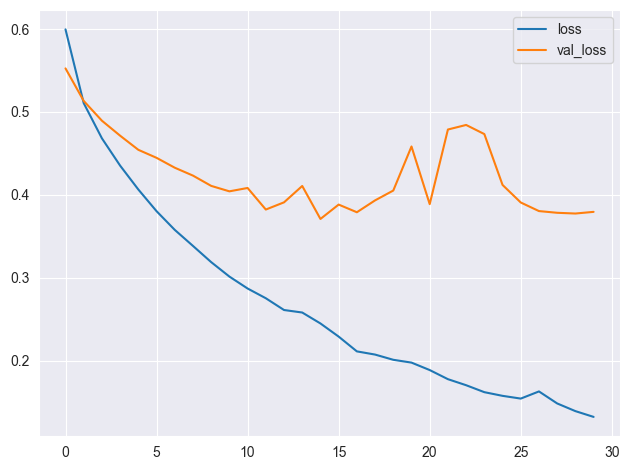

In [2]:
from tensorflow.python.keras.models import load_model
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
# from keras.utils.image_dataset import image_dataset_from_directory
from tensorflow.python.keras.callbacks import EarlyStopping

# Reproducability
def set_seed(seed=88):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(88)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = tf.keras.utils.image_dataset_from_directory(             # BatchDataset one batch (64,128,128,3) images, (64,1) label
    'data/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = tf.keras.utils.image_dataset_from_directory(
    'data/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
        interpolation='nearest',
    batch_size=64,
    shuffle=False,
)
# Create a callback that saves the model's fit history
filename='car-truck-log.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

# Create a callback that saves the model's weights
checkpoint_path = "checkpoint/car-truck/cp.ckpt"
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)    # save weight
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)    # save model
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15,        # stop when 20 epochs less than 0.001 improvement
    restore_best_weights=True,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

pretrained_base = tf.keras.models.load_model(
    'cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

model = keras.Sequential([
    pretrained_base,     # output of pretrained base is 2D
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


if not os.path.exists('history-car-truck.npy'):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    if os.path.exists(checkpoint_path):
        print('continuing previous training progress ')
        # model.load_weights(checkpoint_path)
        model = load_model(checkpoint_path)
    history_const = model.fit(ds_train, validation_data=ds_valid, epochs=60, verbose=2, callbacks=[history_logger, cp_callback, early_stopping])
    history1 = history_const.history
    np.save('history-car-truck.npy', history1)
else:
    print('loading trained model ')
    history1=np.load('history-car-truck.npy',allow_pickle=True).item()
    # model.load_weights(checkpoint_path)
    model = load_model(checkpoint_path)
history_frame = pd.DataFrame(history1)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(model.evaluate(ds_valid))


In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


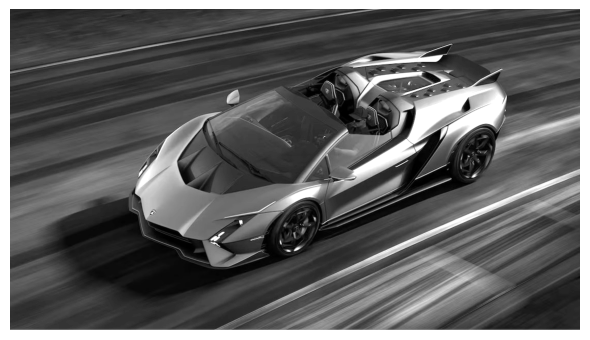

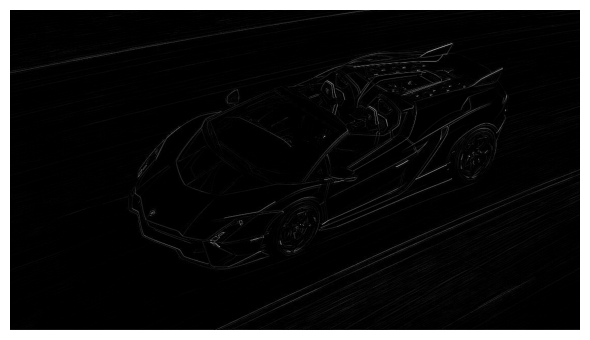

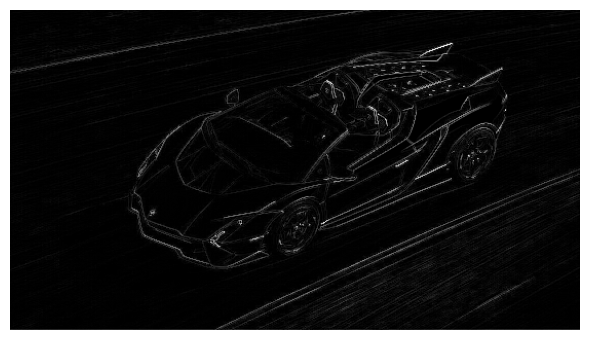

In [4]:
from PIL import Image
import numpy as np
img = Image.open('img/my_car.jpg').convert('L')

img=np.array(img)
img=np.minimum(img*1.5, np.ones_like(img)*255)
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.show()

img=tf.expand_dims(tf.constant(img, dtype=tf.float32), axis=0)
img=tf.expand_dims(img, axis=3)

kernel_in = np.array([
            [[[-1]], [[-1]], [[-1]]],
            [[[-1]], [[8]], [[-1]]],
            [[[-1]], [[-1]], [[-1]]]
        ])

kernel = tf.constant(kernel_in, dtype=tf.float32)
image_filter = tf.nn.conv2d(img, kernel, strides=[1, 1, 1, 1], padding='VALID')

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter),cmap='gray')
plt.axis('off')
plt.show()

image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect),cmap='gray')
plt.axis('off')
plt.show()

image_condense = tf.nn.pool( input=image_detect, window_shape=(2, 2), pooling_type='MAX',
                             strides=(2, 2), padding='SAME')

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense),cmap='gray')
plt.axis('off')
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 128, 128, 1)       0         
                                                                 
 random_contrast (RandomCont  (None, 128, 128, 1)      0         
 rast)                                                           
                                                                 
 module_wrapper_11 (ModuleWr  (None, 128, 128, 32)     832       
 apper)                                                          
                                                                 
 module_wrapper_12 (ModuleWr  (None, 64, 64, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 64, 64, 64)       18496     
 apper)                                               

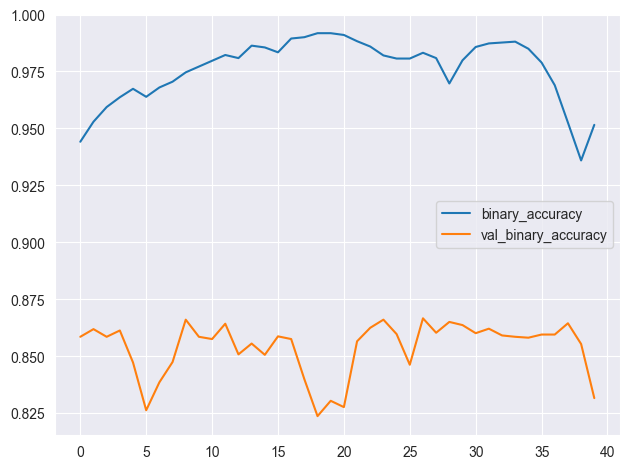

In [5]:
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import *
from keras.layers.preprocessing.image_preprocessing import RandomFlip,RandomContrast
model2 = keras.Sequential([
    RandomFlip('horizontal'), # flip left-to-right
    RandomContrast(0.5), # contrast change by up to 50%
    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model2.build(input_shape=(None,128,128,1))
model2.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# tf.optimizers.Adam(epsilon=0.01),
history = model.fit(ds_train, validation_data=ds_valid, epochs=40, verbose=2)

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# Time Series
    Time series: the basic object of forecasting, which is a set of observations recorded over time.
    Linear Regression with Time Series: learns how to make a weighted sum from its input features. The weights
        are also called regression coefficients and the bias is also called the intercept.
    There are two kinds of features unique to time series: time-step features and lag features.
    Time-step features: derive directly from the time index. The most basic time-step feature is the time dummy,
        which counts off time steps in the series from beginning to end. Time-step features let you model time
        dependence. A series is time dependent if its values can be predicted from the time they occured.
        Alse using DeterministicProcess avoid some tricky failure cases that can arise with time series and
        linear regression.
    Lag features:  shift the observations of the target series so that they appear to have occured later in time.
        from the lag plot (lagged col_1 vs col_1), if there are correlation, then lag feature is useful. lag
        features let you model serial dependence (when observation can be predicted from previous observations).

    Trend: trend component of a time series represents a persistent, long-term change in the mean of the series.
        The trend is the slowest-moving part of a series, representing the largest time scale of importance.
    Moving average plot: compute the average of the values within a sliding window of some defined width for the
        time series. It smooth out any short-term fluctuations in series so that only long-term changes remain.

    Seasonality: there is a regular, periodic change in the mean of the time series. Seasonal changes generally
        follow the clock and calendar -- repetitions over a day, a week, or a year are common. Can forecasting
        any time steps
    Seasonal Indicators: feature best for a season with few observations. Seasonal indicators are what you get
        if you treat a seasonal period as a categorical feature and apply one-hot encoding. Linear regression
        works best if you drop one of the indicators(one-hot generated columns)

    Fourier features: feature best for a season with many observations, capture the overall shape of the seasonal
        curve with just a few features. Fourier features are pairs of sine and cosine curves, one pair for each
        potential frequency in the season starting with the longest. Fourier pairs modeling annual seasonality
        would have frequencies: once per year, twice per year, three times per year, and so on. If we add a set
        of these sine / cosine curves to our training data, the linear regression algorithm will figure out the
        weights that will fit the seasonal component in the target series. need far less features than seasonal
        indicators, which means reduced computation time and less risk of overfitting.
    Periodogram: tells the strength of the frequencies in a time series, used to decide how many pairs of sine/
        cosine needed for Fourier features (check from what's the freqency where variancr start to drop off
        significantly)

    Cycles: are patterns of growth and decay in a time series associated with how the value in a series at one
        time depends on values at previous times, but not necessarily on the time step itself. Cycles are not
        necessarily time dependent(more irregular), as seasons are. What happens in a cycle is less about the
        particular date of occurence, and more about what has happened in the recent past.

    Lag features:  shift the observations of the target series so that they appear to have occured later in time.
        Using lagged series/ plot to detect cycles. To forecast one series y, could use y_lag_1 and y_lag_2 as
        features to predict the target y. A lag plot of a time series shows its values plotted against its lags.
        The most commonly used measure of serial dependence is known as autocorrelation, which is simply the
        correlation a time series has with one of its lags.
    The partial autocorrelation tells you the correlation of a lag accounting for all of the previous lags -- the
        amount of "new" correlation the lag contributes. Plotting the partial autocorrelation(correlogram) can
        help choose which lag features to use (from lag 1 to lag #, where there is less "new" and fell under
        threshold). Autocorrelation and partial autocorrelation only measures of linear dependence. it's best to
        look at a lag plot (or use some more general measure of dependence, like mutual information) when choosing
        lag features. Non-linear relationships can either be transformed to be linear or else learned by an
        appropriate algorithm. limited to forecasting time steps whose lagged values are available.
    leading indicators: model using only lags of the target series as featuresneeds a time step to react to sudden
        changes in the target series (a common limitation). To improve the forecast we could try to find leading
        indicators, time series(new column) that could provide an "early warning" for changes in flu cases.
    Assumed that we could always generate lags up to the period we wanted to forecast (every prediction was for just
        one step forward, in other words)

    Hybrid Models: Linear regression excels at extrapolating trends, but can't learn interactions. XGBoost excels at
        learning interactions, but can't extrapolate trends. Many time series can be closely described by an additive
        model of just these three components (trend, seasons, and cycles) plus some essentially unpredictable,
        entirely random error. Model learning the components of a time series as an iterative process (for each
        component, fit the time series, then subtract fitted data for this component from time seies)
        The residuals of a model are the difference between the target the model was trained on and the predictions
        the model makes.

    There are generally two ways a regression algorithm can make predictions: either by transforming the features or
        by transforming the target.
    Feature-transforming algorithms: learn some mathematical function that takes features as an input and then combines
        and transforms them to produce an output that matches the target values in the training set. Linear regression
        and neural nets are of this kind. Generally can extrapolate target values beyond the training set given
        appropriate features as inputs
    Target-transforming algorithms: use the features to group the target values in the training set and make predictions
        by averaging values in a group; a set of feature just indicates which group to average. Decision trees and
        nearest neighbors are of this kind. Can't extrapolate trend.
    Hybrid Forecasting with Residuals: possible to use one algorithm to fit the original series and then the second
        algorithm to fit the residual series. usually want to use different feature sets (X_train_1 and X_train_2
        above) depending on what we want each model to learn. (Ex. trend feature only needed for trend model).
        The most common strategy for constructing hybrids is the one we've just described: a simple (usually linear)
        learning algorithm followed by a complex, non-linear learner like GBDTs or a deep neural net.
        1. Boosted hybrids: Use linear regression to extrapolate the trend, transform the target to remove the trend,
        and apply XGBoost to the detrended residuals . Or 2. Stacked hybrids: to hybridize a neural net (a feature
        transformer), you could instead include the predictions of another model as a feature, which the neural net
        would then include as part of its own predictions.
    Forecast origin: is time at which you are making a forecast. Everything up to he origin can be used to create
        features.
    Forecast horizon: is the time for which you are making a forecast. We often describe a forecast by the number of
        time steps in its horizon: a "1-step" forecast.
    Lead time (latency):  The time between the origin and the horizon is the of the forecast. A forecast's lead time
        is described by the number of steps from origin to horizon: a "1-step ahead". In practice can start forecast
        multiple steps ahead of the origin.
    Multistep Forecasting Strategies: For multistep forecasts, we are requiring a model to produce multiple outputs,
        one for each step for a single forecast origin. There are a number of strategies:
        Multioutput model: Use a model that produces multiple outputs naturally. Linear regression and neural networks
            can both produce multiple outputs. This strategy is simple and efficient, but not possible for every algorithm
            you might want to use.
        Direct strategy: Train a separate model for each step in the horizon. Forecasting 1-step ahead is a different
            problem than 2-steps ahead (and so on), training lots of models can be computationally expensive.
        Recursive strategy: Train a single one-step model and use its forecasts to update the lag features for the next
            step. Only need to train one model, but since errors will propagate from step to step, forecasts can be
            inaccurate for long horizons.
        DirRec strategy: A combination of the direct and recursive strategies: train a model for each step and use
            forecasts from previous steps as new lag features. Step by step, each model gets an additional lag input. DirRec
            strategy can capture serial dependence better than Direct, but also suffer from error propagation like Recursive.




22.49744953347821 98176.20634409295
0.5329660641208303 49780.6248690696
[22.49744953] 98176.20634409295
[0.53296606] 49780.624869069565


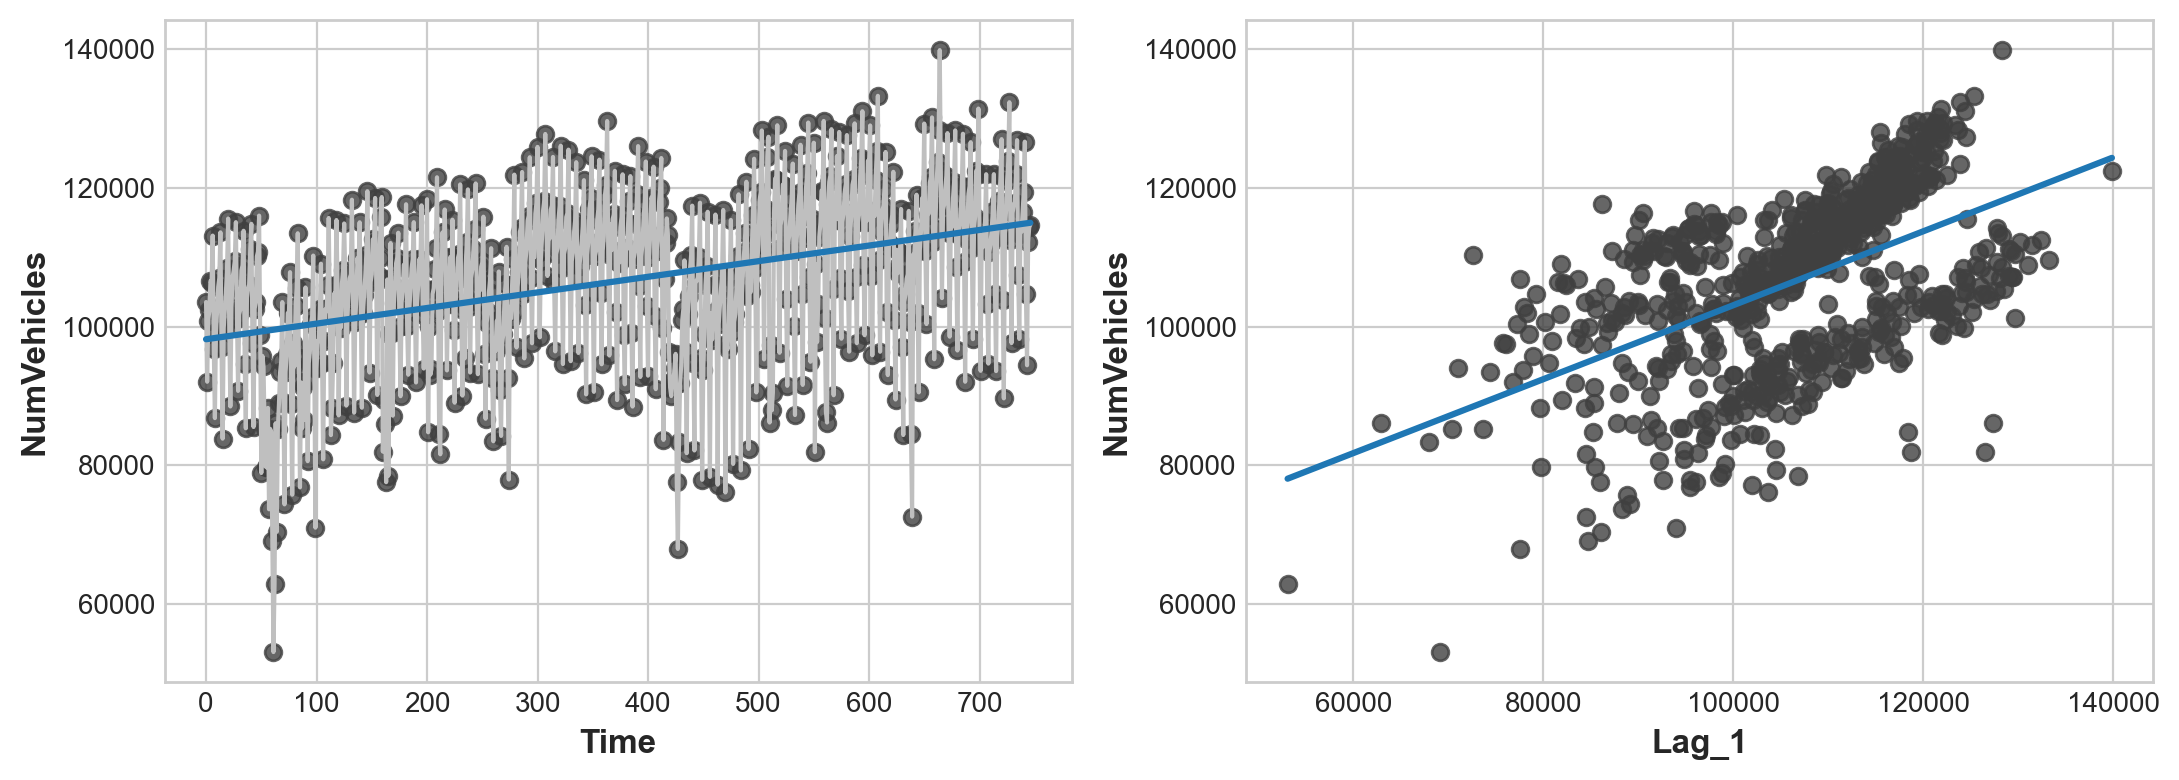

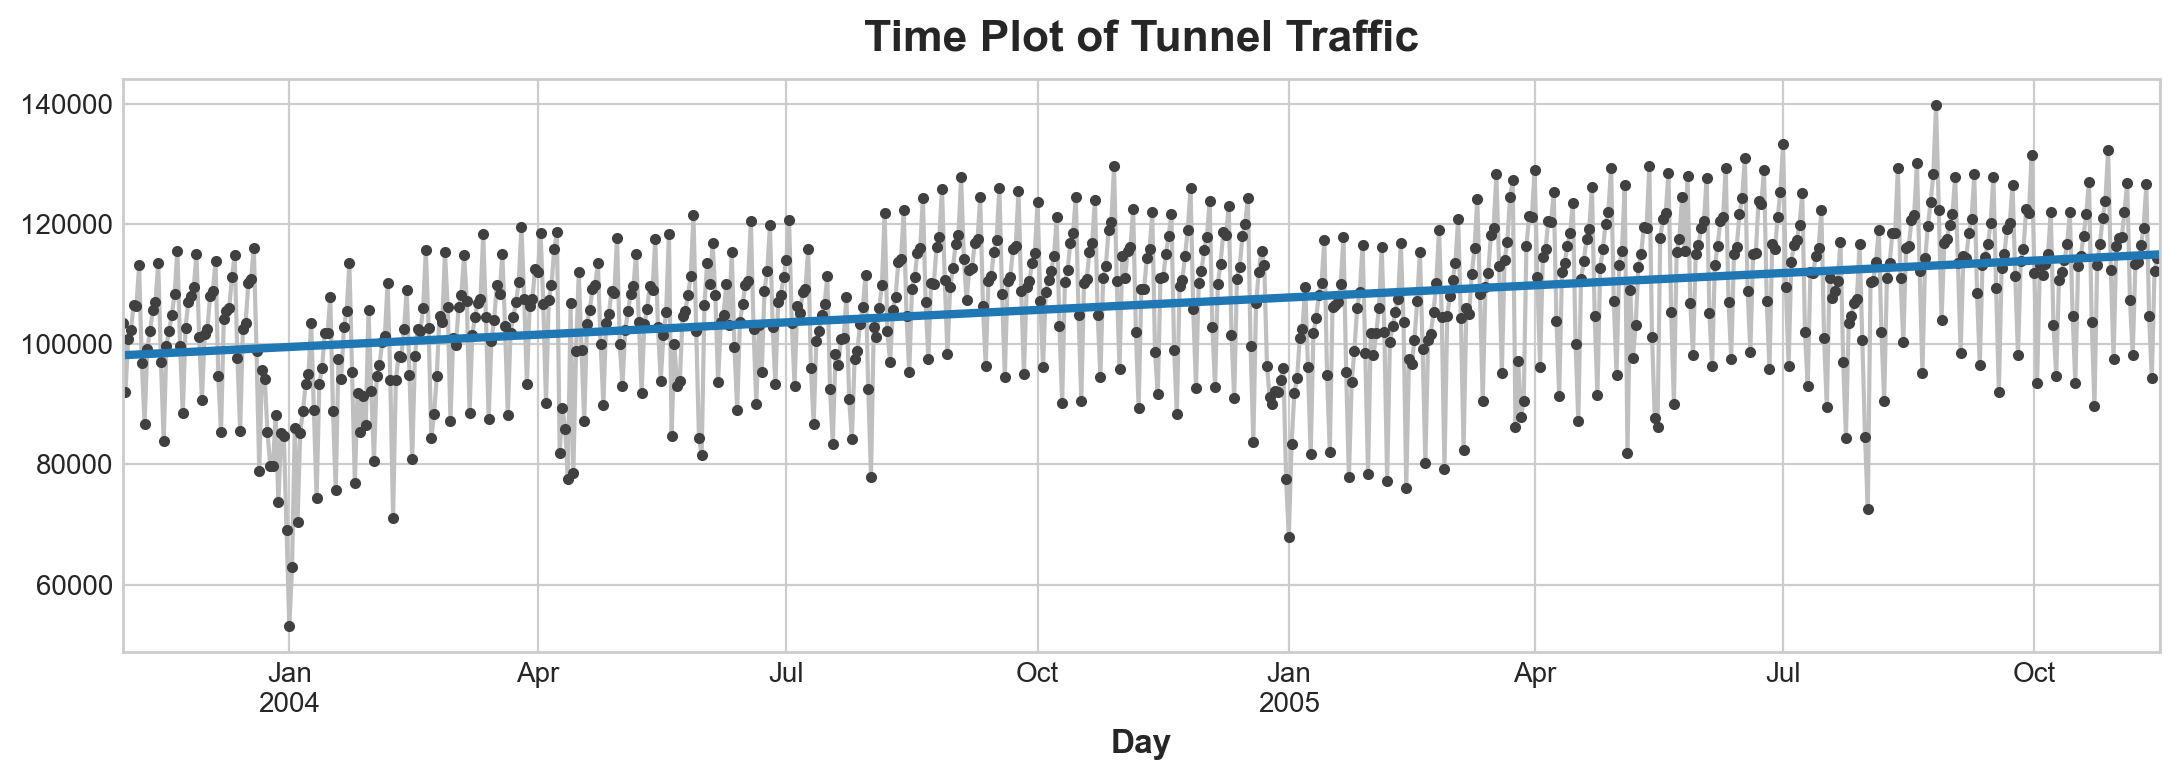

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/tunnel.csv", index_col='Day', parse_dates=["Day"])
df['Time'] = np.arange(len(df.index))
fig, ax = plt.subplots(1, 2)
ax[0].plot('Time', 'NumVehicles', data=df, color='0.75')
p = sns.regplot(ax=ax[0], x='Time', y='NumVehicles', data=df, ci=None, scatter_kws=dict(color='0.25'))
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print(slope, intercept)

df['Lag_1'] = df['NumVehicles'].shift(1)
df = df.reindex(columns=['NumVehicles', 'Lag_1', 'Time'])  # change columns order, columns can add new column with NaN value
p = sns.regplot(ax=ax[1], x='Lag_1', y='NumVehicles', data=df, ci=None, scatter_kws=dict(color='0.25'))#
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print(slope, intercept)



# Time-step features
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)
y_pred = pd.Series(model.predict(X), index=X.index)

plt.figure()
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');



# Lag feature
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)
y_pred = pd.Series(model.predict(X), index=X.index)

fig, ax =plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

            const  trend
Day                     
2003-11-01    1.0    1.0
2003-11-02    1.0    2.0
2003-11-03    1.0    3.0
2003-11-04    1.0    4.0
2003-11-05    1.0    5.0 <class 'pandas.core.frame.DataFrame'>
2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64


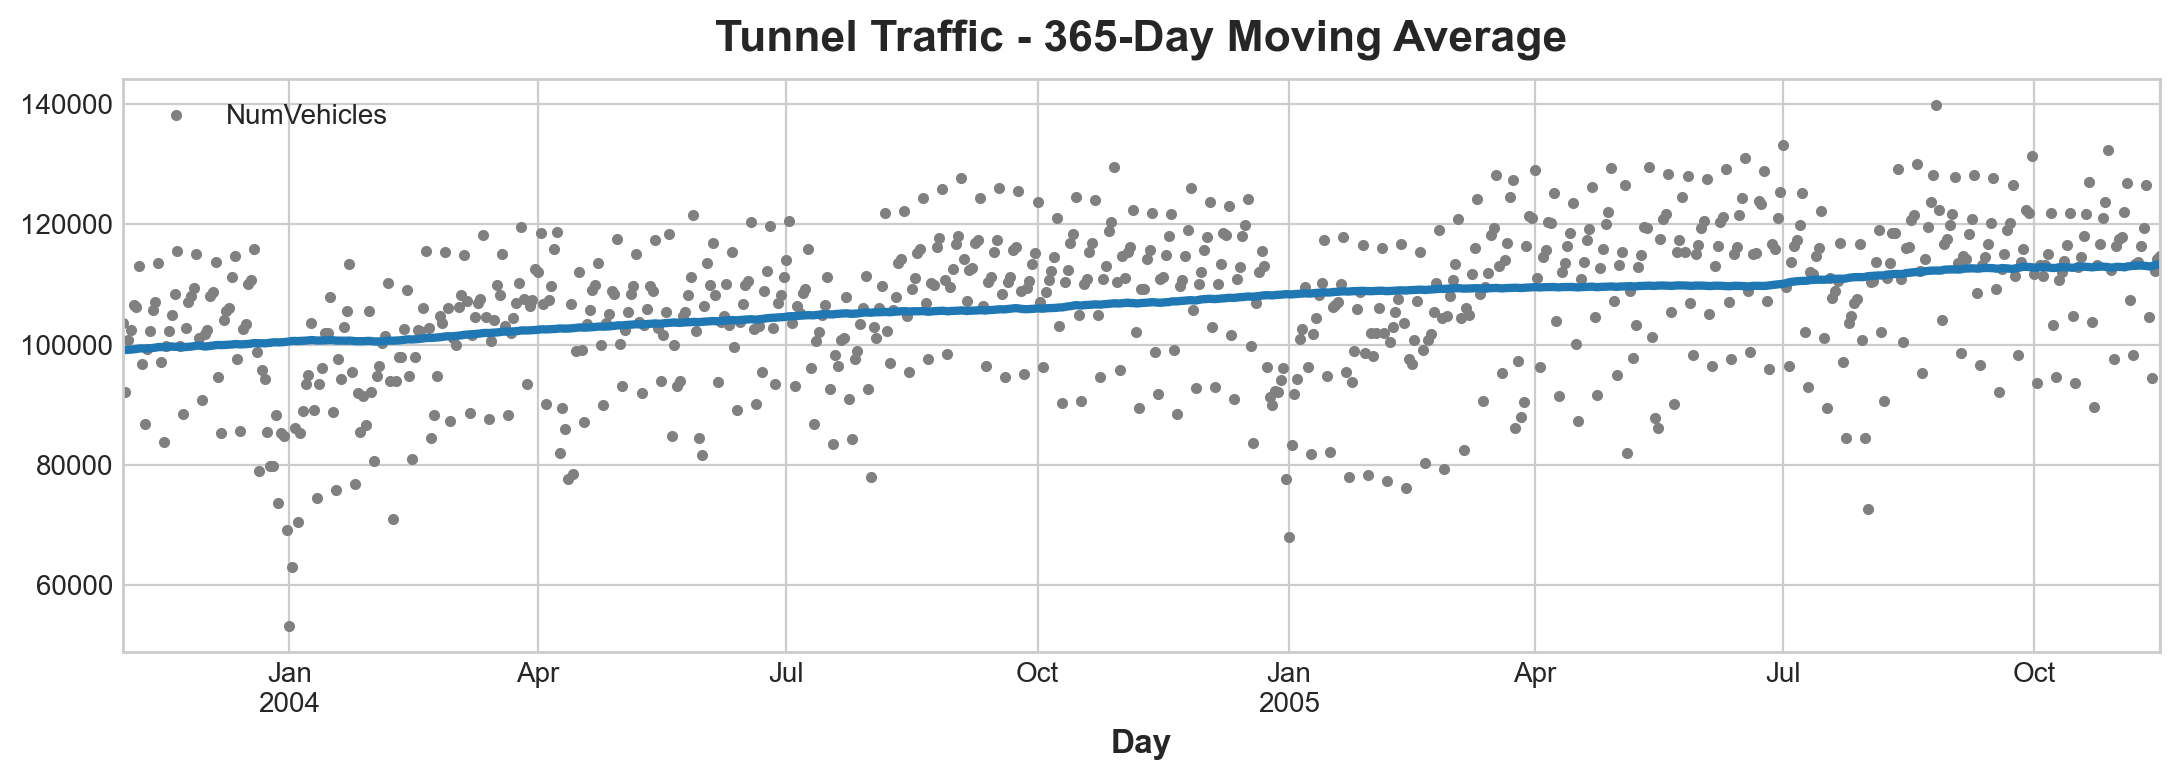

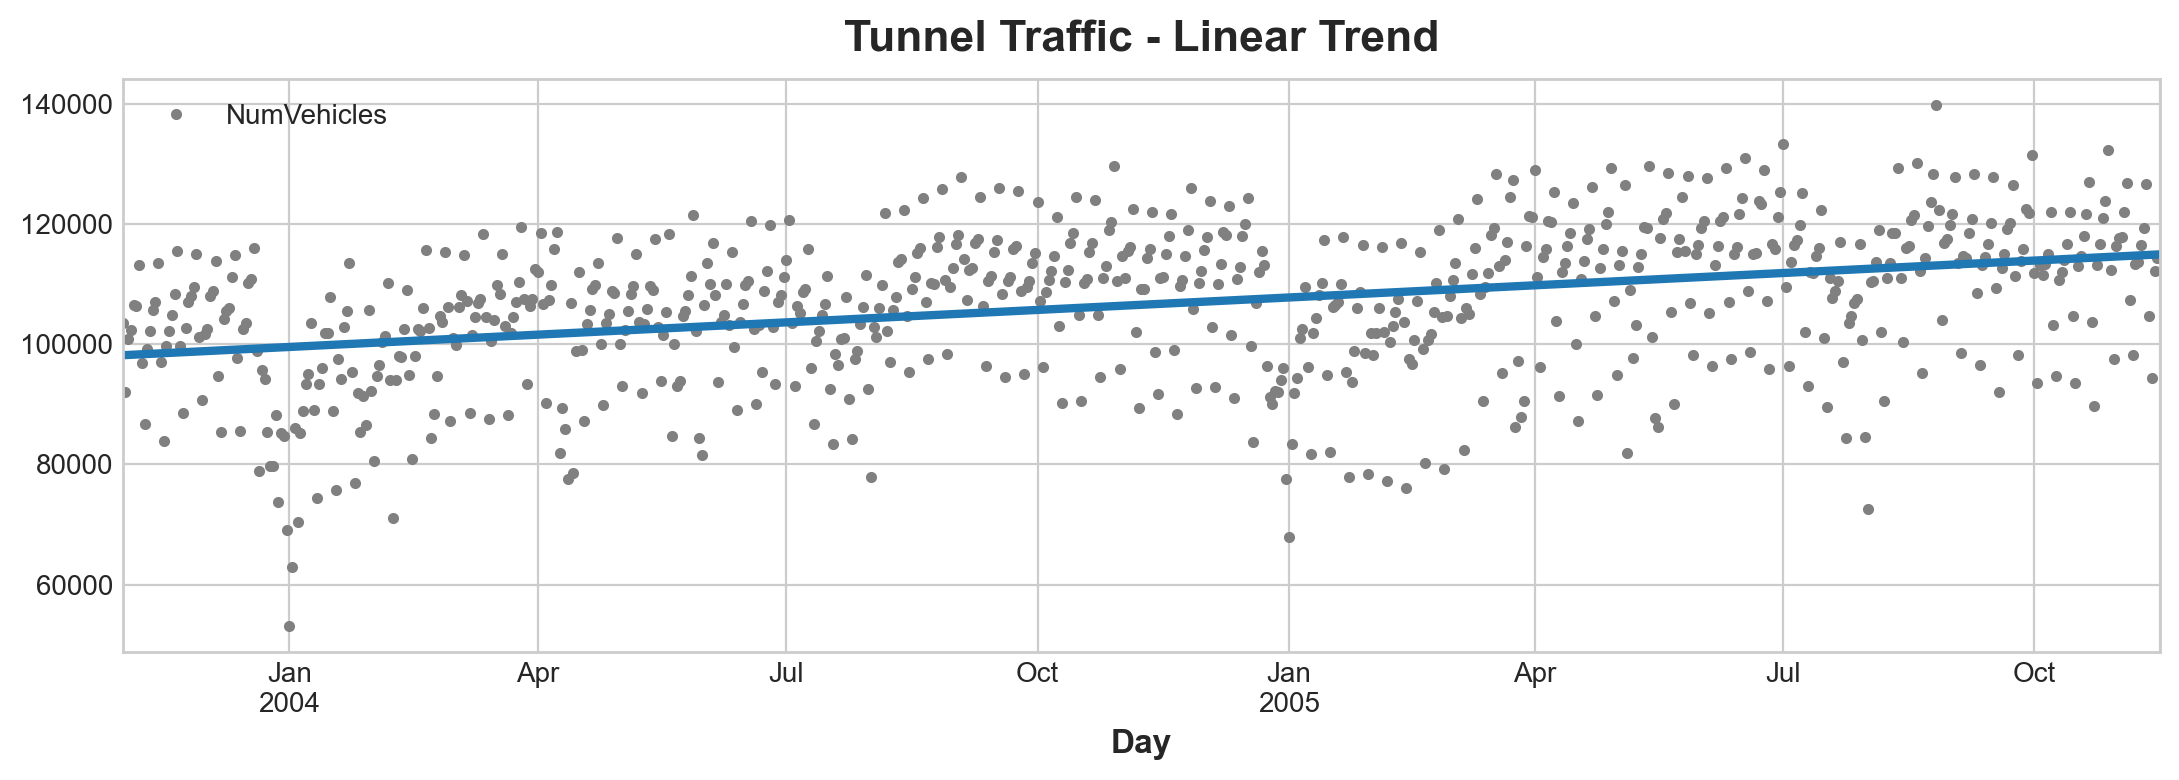

In [25]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/tunnel.csv", parse_dates=["Day"])
df = df.set_index("Day").to_period()   # Convert DataFrame from DatetimeIndex to PeriodIndex.
moving_average = df.rolling(               # for current index i, calculate [max(0, i-182), min(i+182, len(df.index)] mean
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)
ax = df.plot(style=".", color="0.5")
moving_average.plot(ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False)


# same as time-step features, avoid some tricky failure cases that can arise with time series and linear regression
# only generate a time-step features, other columns are ignored
dp = DeterministicProcess(
    index=df.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept) default 1
    order=1,             # the time dummy (trend), 1 for linear, 2 for quadratic, 3 for cubic, and so on
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
print(X.head(), type(X))


y = df["NumVehicles"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = df.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

X = dp.out_of_sample(steps=30)     # create addition time-step features value for next 30 steps
y_fore = pd.Series(model.predict(X), index=X.index)
print(y_fore.head())

ax = df["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend", color="0.75")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()


            const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
Day                                                                        
2003-11-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2003-11-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2003-11-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2003-11-04    1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2003-11-05    1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   

            sin(1,freq=A-DEC)  cos(1,freq=A-DEC)  ...  sin(6,freq=A-DEC)  \
Day                                               ...                      
2003-11-01          -0.867456           0.497513  ...          -0.017213   
2003-11-02          -0.858764           0.512371  ...           0.085965   
2003-11-03          -0.849817           0.527078  ...           0.188227   
2003-11-04          -0.840618           0.541628  ...           0.288482   
2003-11-05 

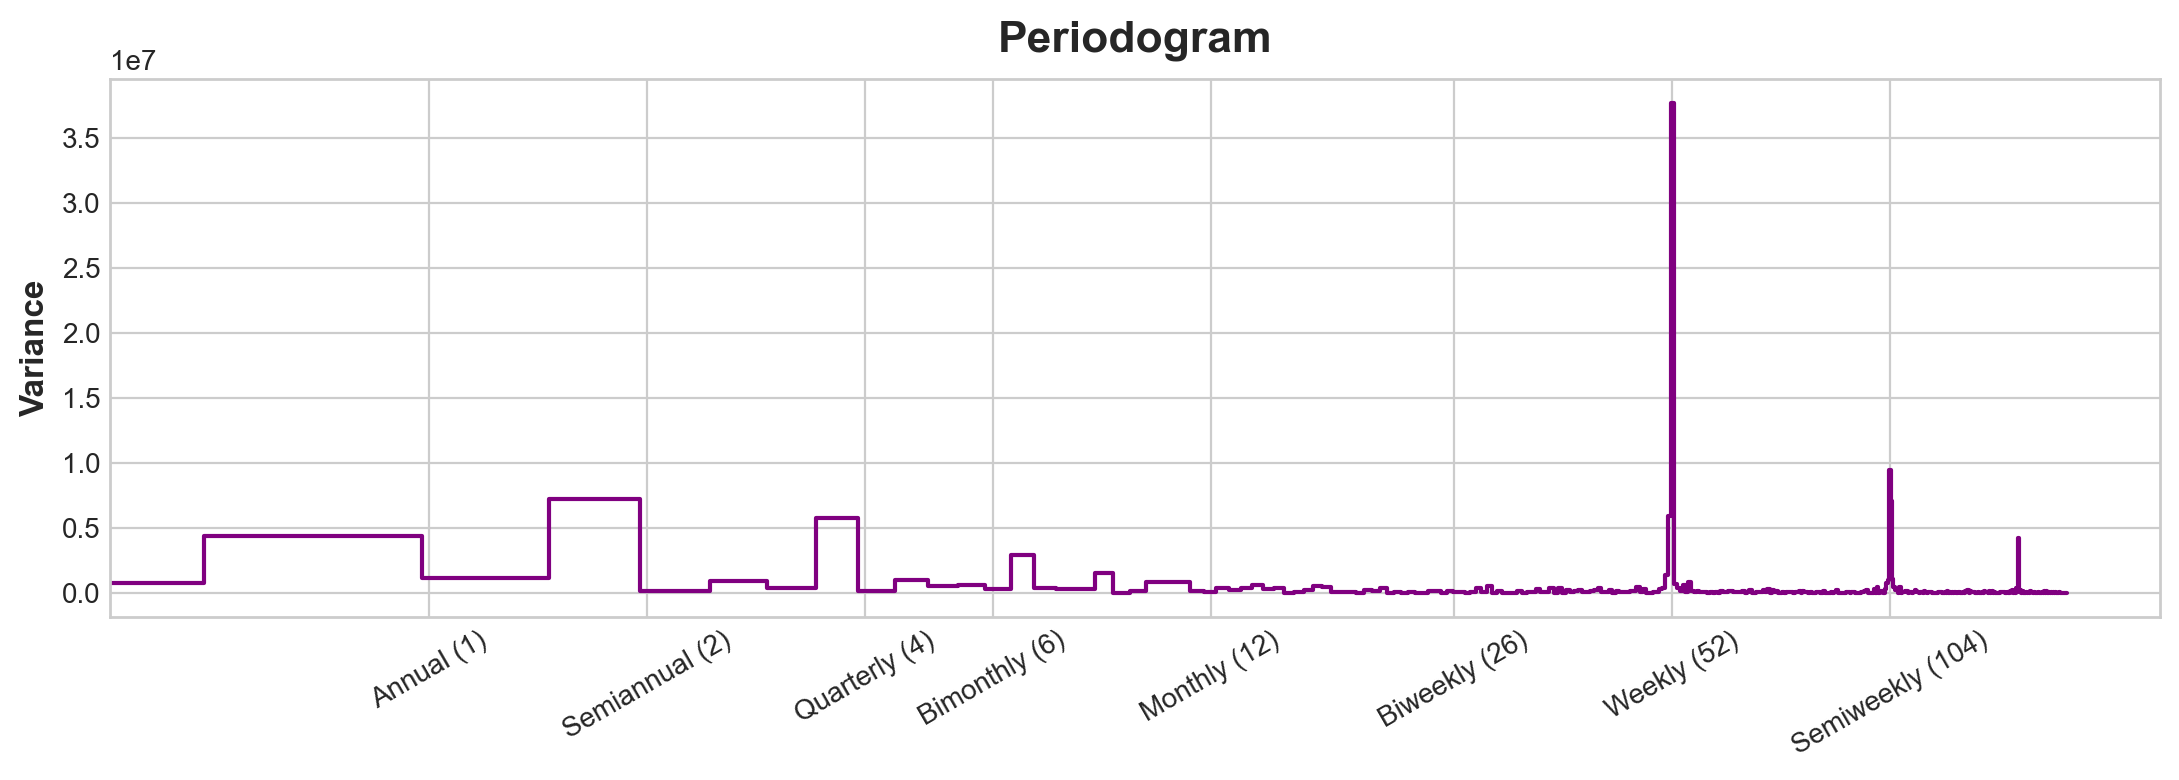

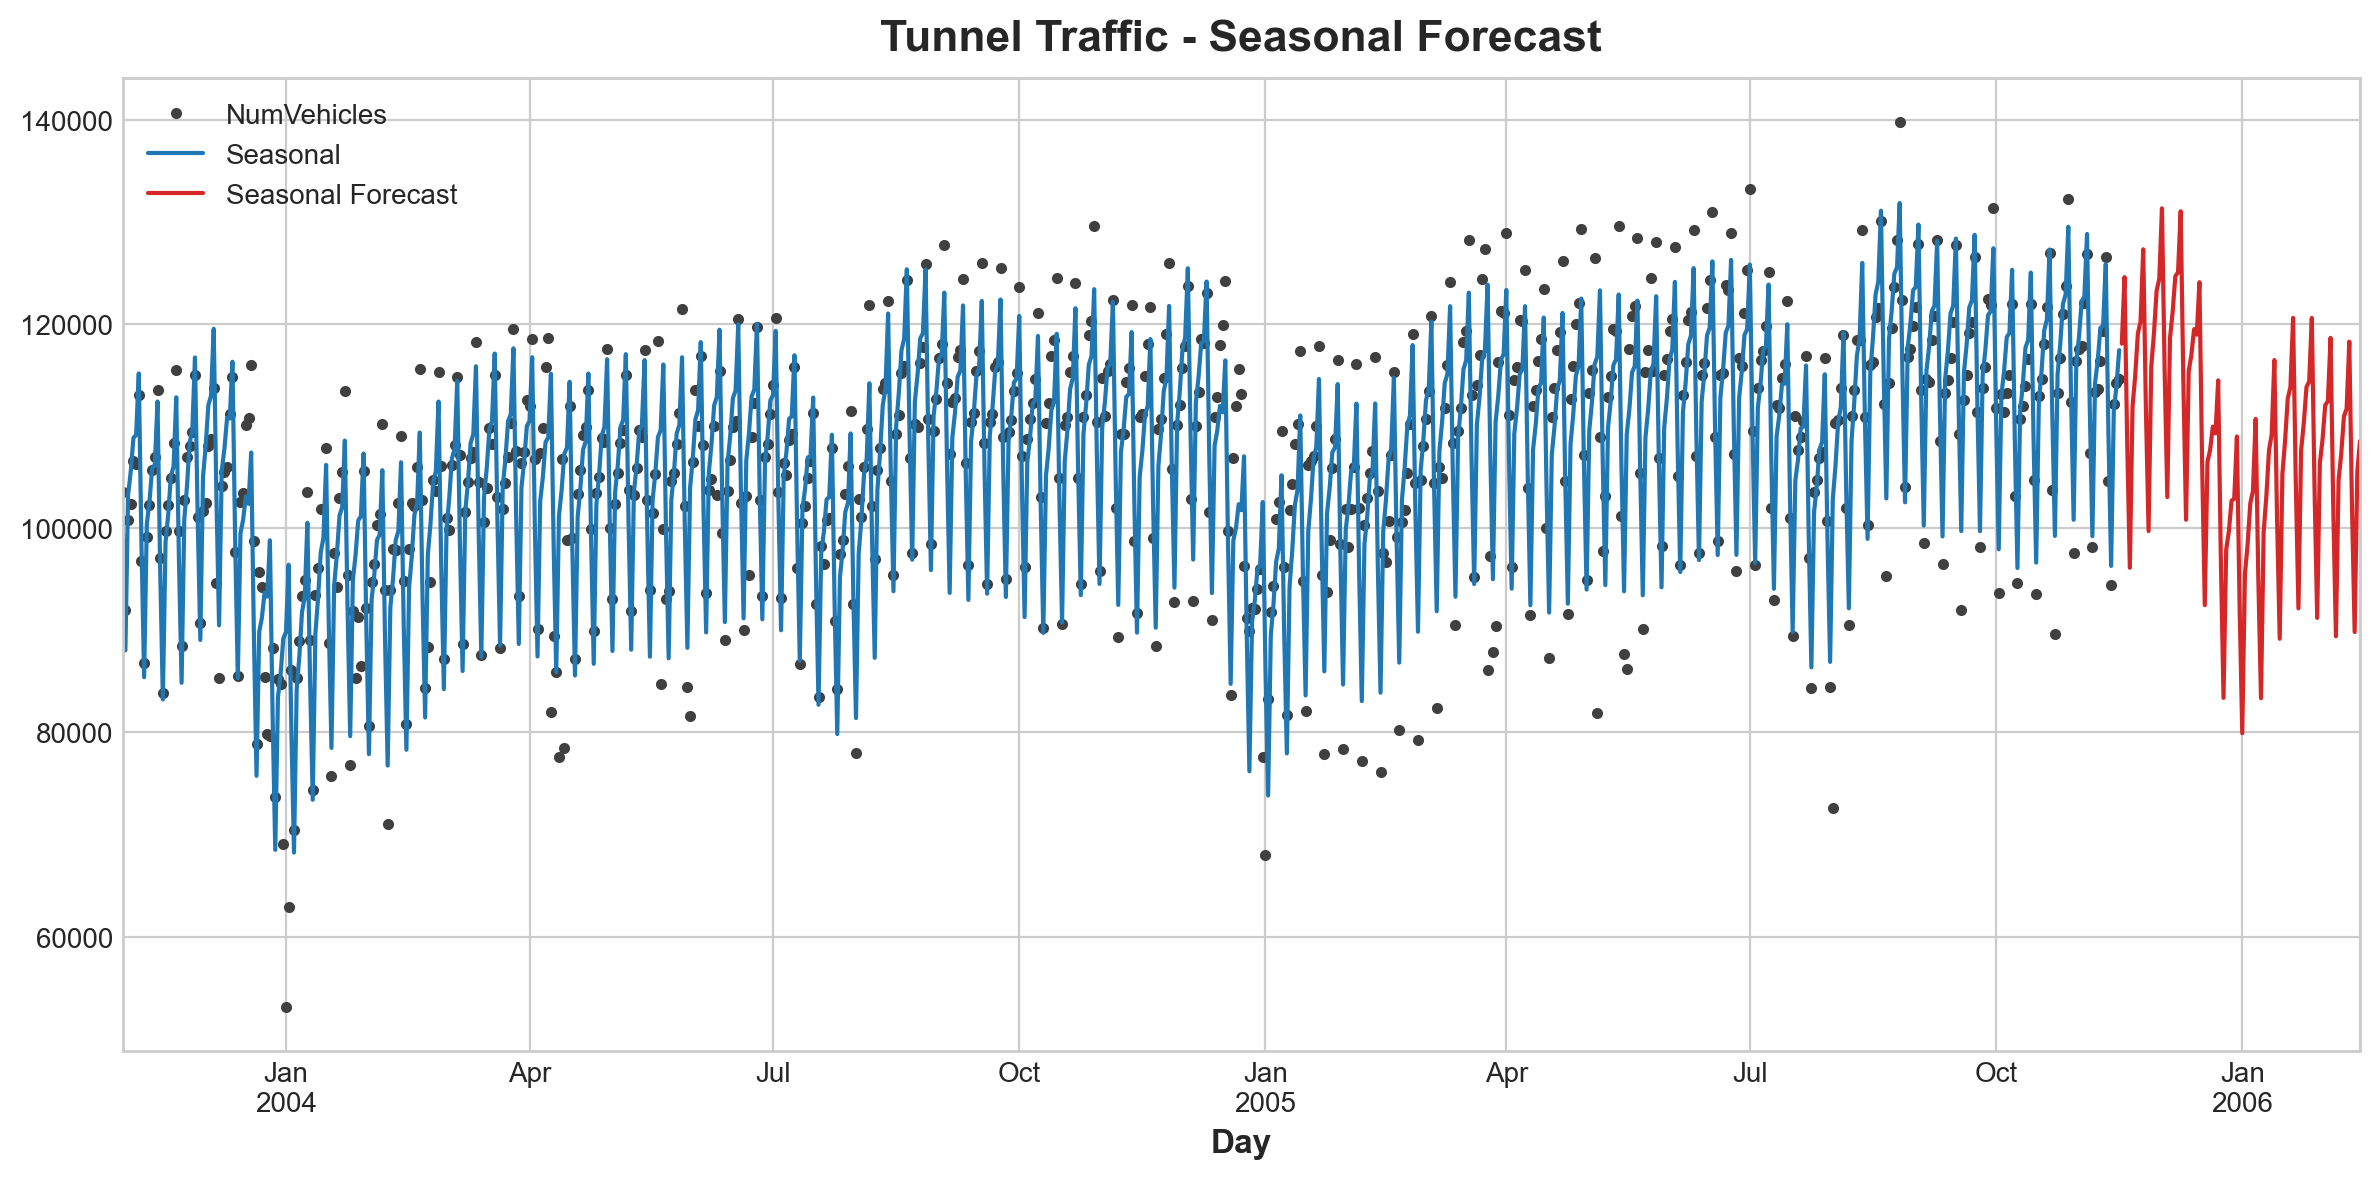

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax



tunnel = pd.read_csv("data/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1)

plot_periodogram(tunnel.NumVehicles)
# The weekly season we'll model with indicators and the annual season with Fourier features.
# From right to left, the periodogram falls off between Bimonthly (6) and Monthly (12), so let's use 10 Fourier pairs.

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index
print(X.head())
y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

plt.figure(figsize=(12,6))
ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

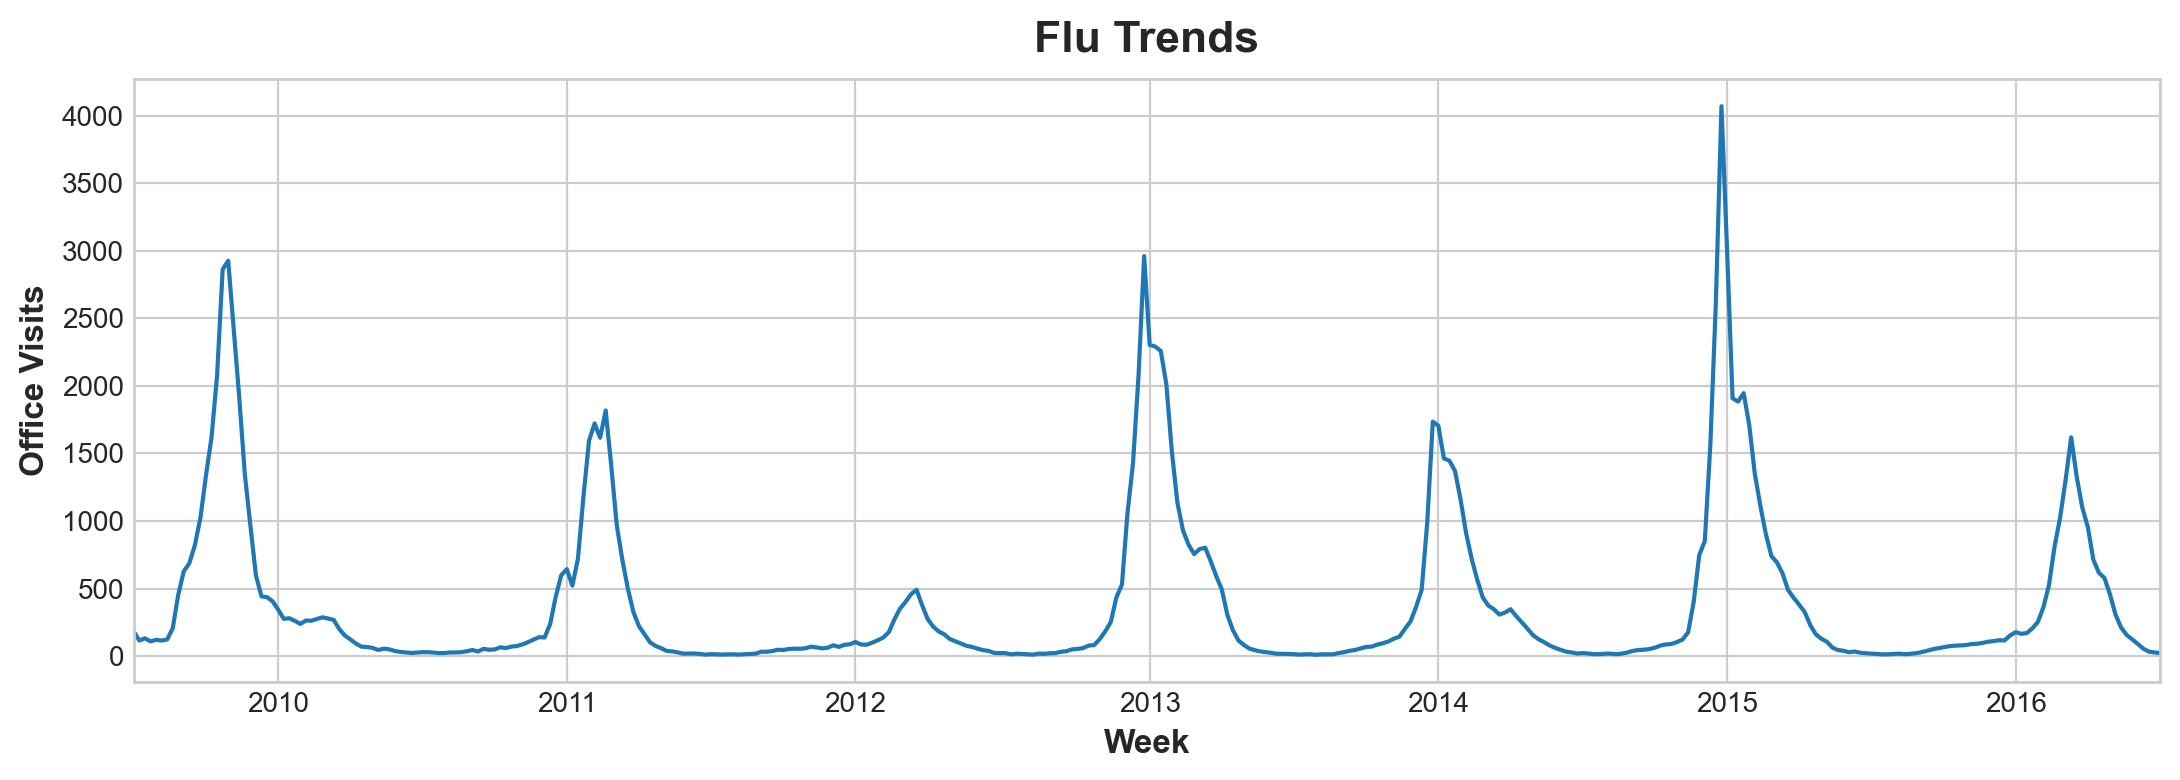

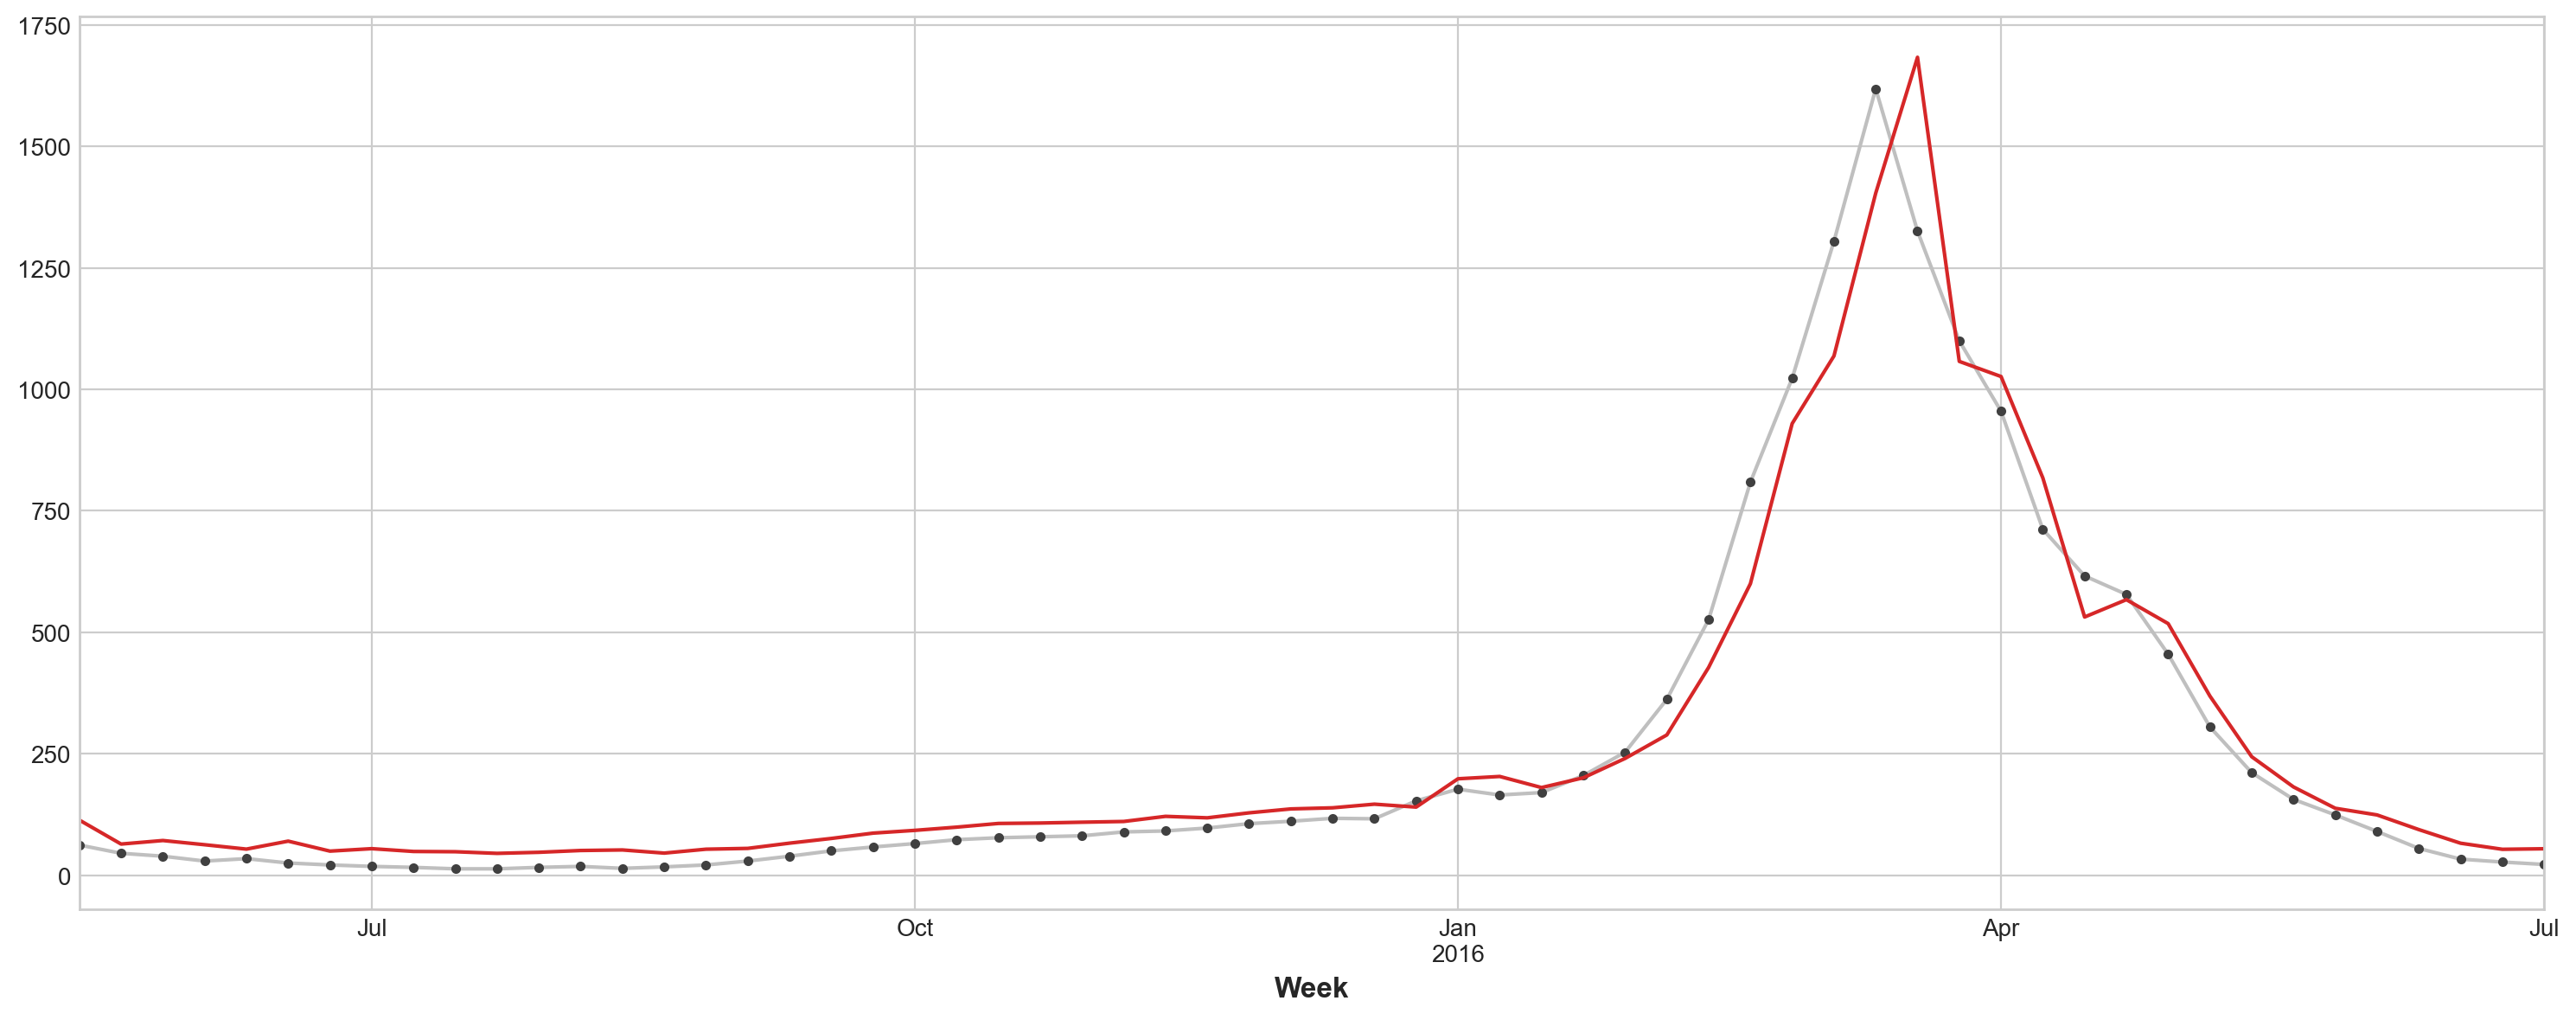

In [46]:
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


flu_trends = pd.read_csv("data/flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends')
_ = ax.set(ylabel="Office Visits")
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
# the partial autocorrelations suggest the dependence can be captured using lags 1, 2, 3, and 4.
_ = plot_pacf(flu_trends.FluVisits, lags=12)

def make_lags(ts, lags):

    if isinstance(ts, pd.Series):
        return pd.concat({f'y_lag_{i}': ts.shift(i) for i in range(1, lags + 1)}, axis=1)

    elif isinstance(ts, pd.DataFrame):
        return pd.concat({f'y_lag_{i}_{col}': ts[col].shift(i) for i in range(1, lags + 1) for col in ts.columns}, axis=1)
    return ts

X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

plt.figure(figsize=(15,6))
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')   # significant lag of prediction


plt.figure(figsize=(15,6))
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

ax = flu_trends.plot(y=["FluCough", "FluVisits"], secondary_y="FluCough")
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

X0 = make_lags(flu_trends[search_terms], lags=3)
X1 = make_lags(flu_trends['FluVisits'], lags=4)

X = pd.concat([X0, X1], axis=1).fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

plt.figure(figsize=(15,6))
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')
# still not good, just approximately predict new data on a line of previous 2 points,
# can only predict when the lag has value for real world forecast

                       Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01              8964           29589
1992-02-01              9023           28570
1992-03-01             10608           29682
1992-04-01             11630           30228
1992-05-01             12327           31677
            const  trend  trend_squared
Month                                  
1992-01-01    1.0    1.0            1.0
1992-02-01    1.0    2.0            4.0
1992-03-01    1.0    3.0            9.0
1992-04-01    1.0    4.0           16.0
1992-05-01    1.0    5.0           25.0                        Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01              8964           29589
1992-02-01              9023           28570
1992-03-01             10608           29682
1992-04-01             11630           30228
1992-05-01             12327           31677


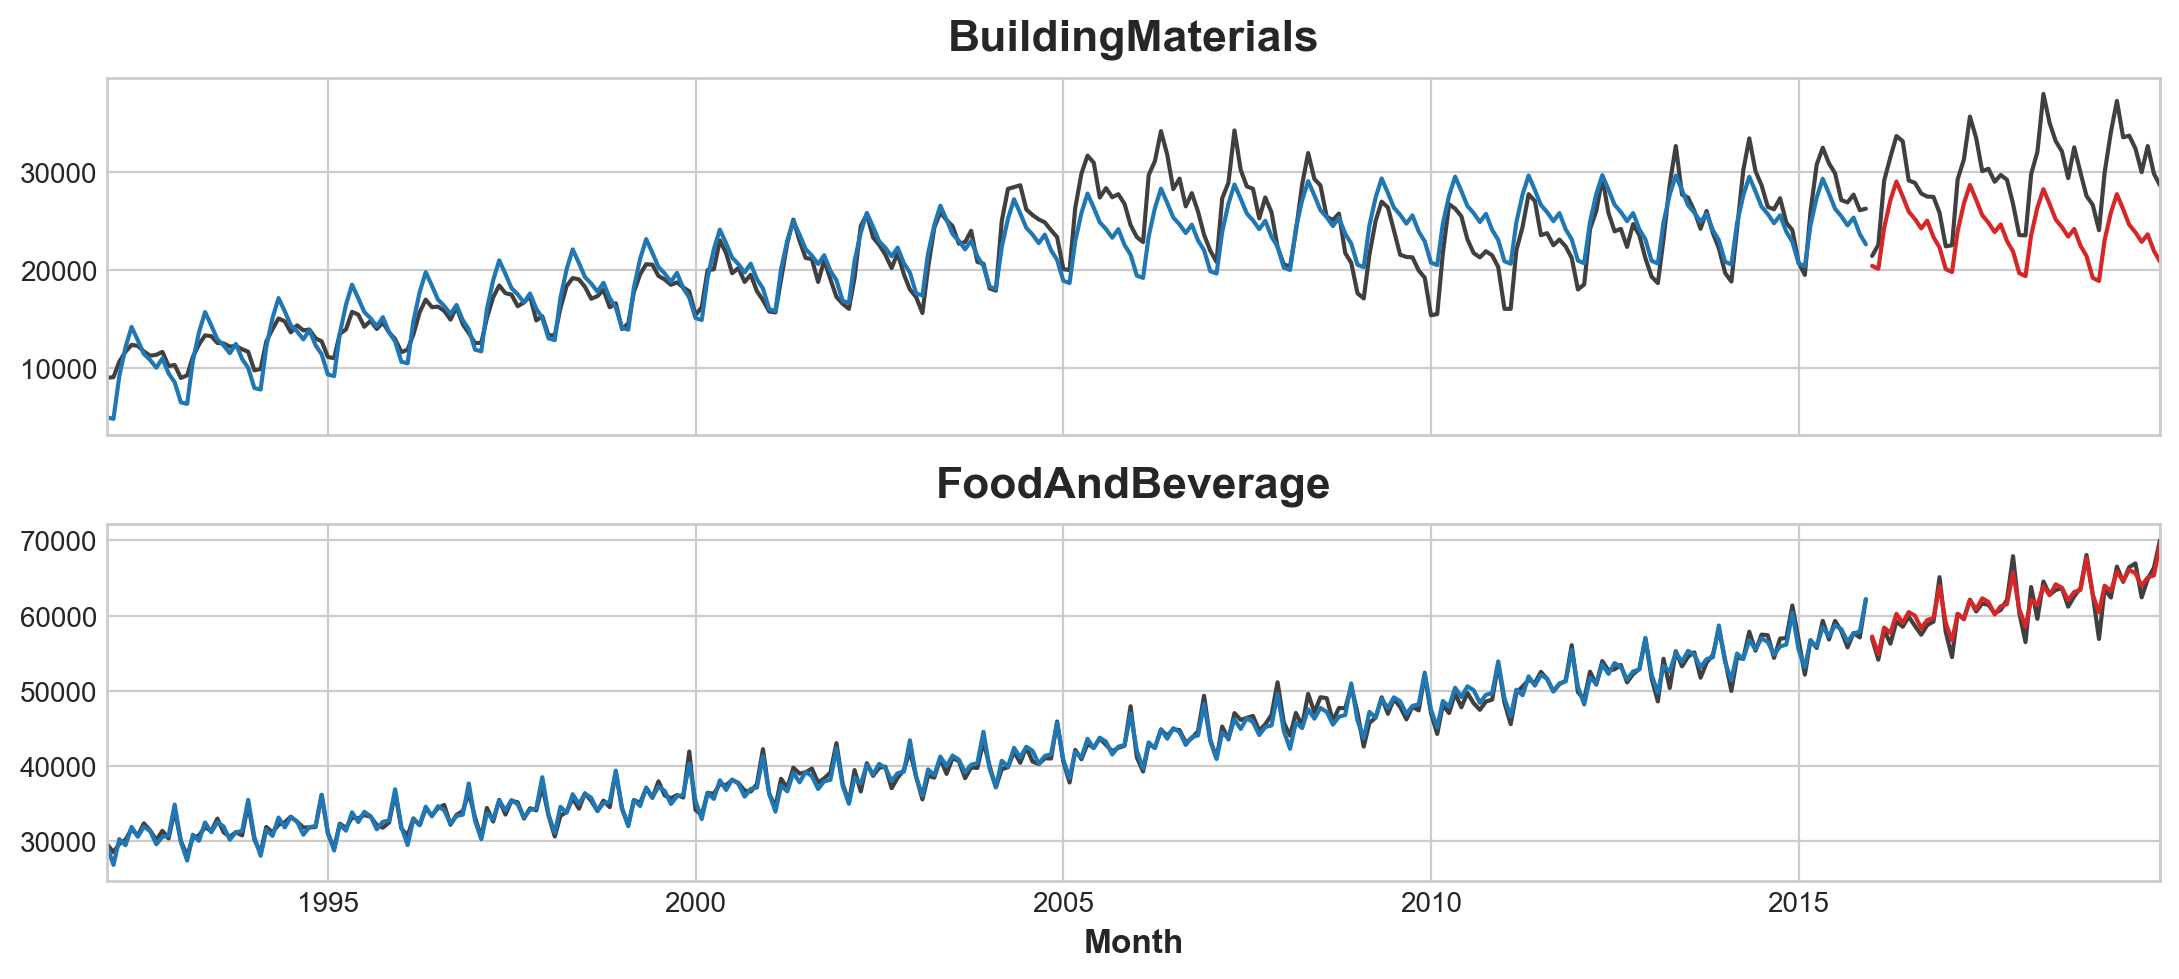

In [21]:
industries = ["BuildingMaterials", "FoodAndBeverage"]
retail = pd.read_csv("data/us-retail-sales.csv", usecols=['Month'] + industries,
    parse_dates=['Month'], index_col='Month').to_period('D').reindex(columns=industries)
retail = pd.concat({'Sales': retail}, names=[None, 'Industries'], axis=1)
print(retail.head())

y = retail.copy()

# Create trend features
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=2,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample()  # features for the training data

# Test on the years 2016-2019. It will be easier for us later if we
# split the date index instead of the dataframe directly.
idx_train, idx_test = train_test_split(y.index, test_size=12 * 4, shuffle=False)
X_train, X_test = X.loc[idx_train], X.loc[idx_test]  #X.loc[idx_train, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]


# Fit trend model, linear regression algorithm is capable of multi-output regression
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = pd.DataFrame(model.predict(X_train), index=y_train.index, columns=y_train.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=y_test.index, columns=y_test.columns)

print(X_train.head(), y_train.head())
# Plot
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")


# the XGBoost algorithm is not capable of multi-output regression,
# The `stack` method converts column labels to row labels, pivoting from wide format to long
X = retail.stack()  # pivot dataset wide to long
y = X.pop('Sales')  # grab target series, y is a series with multi-index(month, industries)
# Turn row labels into categorical feature columns with a label encoding
X = X.reset_index('Industries')
# Label encoding for 'Industries' feature
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()

# Label encoding for annual seasonality
X["Month"] = X.index.month  # values are 1, 2, ..., 12

# Create splits
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]
print(X_train.head())
print(y_train.head())

# Pivot wide to long (stack) and convert DataFrame to Series (squeeze)
y_fit = y_fit.stack().squeeze()    # trend from training set
y_pred = y_pred.stack().squeeze()  # trend from test set

# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit

# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_fit
y_pred_boosted = xgb.predict(X_test) + y_pred

axs = y_train.unstack(['Industries']).plot(
    color='0.25', figsize=(11, 5), subplots=True, sharex=True,
    title=['BuildingMaterials', 'FoodAndBeverage'],
)
axs = y_test.unstack(['Industries']).plot(
    color='0.25', subplots=True, sharex=True, ax=axs,
)
axs = y_fit_boosted.unstack(['Industries']).plot(
    color='C0', subplots=True, sharex=True, ax=axs,
)
axs = y_pred_boosted.unstack(['Industries']).plot(
    color='C3', subplots=True, sharex=True, ax=axs,
)
for ax in axs: ax.legend([])

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

def make_lags(ts, lags, lead_time=1):
    return pd.concat({f'y_lag_{i}': ts.shift(i) for i in range(lead_time, lags + lead_time)}, axis=1)

def make_multistep_target(ts, steps):
    return pd.concat({f'y_step_{i + 1}': ts.shift(-i) for i in range(steps)}, axis=1)

def myplot(df, y_fit, y_pred):
    palette = dict(palette='husl', n_colors=64)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
    ax1 = df.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
    ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
    _ = ax1.legend(['FluVisits (train)', 'Forecast'])
    ax2 = df.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
    ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
    _ = ax2.legend(['FluVisits (test)', 'Forecast'])

flu_trends = pd.read_csv("data/flu-trends.csv")
flu_trends.set_index(pd.PeriodIndex(flu_trends.Week, freq="W"), inplace=True)
flu_trends.drop("Week", axis=1, inplace=True)

y = flu_trends.FluVisits.copy()
X = make_lags(y, lags=4).fillna(0.0)  # Four weeks of lag features
y = make_multistep_target(y, steps=8).dropna()  # Eight-week forecast
# Shifting has created indexes that don't match. Only keep times for which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Multioutput model
model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}")

myplot(flu_trends, y_fit, y_pred)

# Direct
# XGBoost can't produce multiple outputs for regression tasks. But by applying the Direct
# reduction strategy, we can still use it to produce multi-step forecasts
model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}")

myplot(flu_trends, y_fit, y_pred)

Train RMSE: 389.12
Test RMSE: 582.33
Train RMSE: 1.22
Test RMSE: 526.45


In [95]:
from keras.layers.normalization.batch_normalization import BatchNormalization
X_train_=X_train.copy()
X_test_=X_test.copy()
y_train_=y_train.copy()
y_test_=y_test.copy()

# X_train=tf.convert_to_tensor(X_train)
# X_test=tf.convert_to_tensor(X_test)
# y_train=tf.convert_to_tensor(y_train)
# y_test=tf.convert_to_tensor(y_test)

early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

features, output = X_train.shape[1], y_train.shape[1]
# deep neural network
model = keras.Sequential([
    BatchNormalization(),
    layers.Dense(units=64, activation='relu', input_shape=(None, features)), # the hidden ReLU layers
    #layers.Dense(units=64),

    layers.Dense(units=64, activation='relu'),  # activation: apply activation function to each neuron in one layer
    layers.ReLU(),
    layers.Dropout(rate=0.5), # apply 20% dropout to the previous layer

    BatchNormalization(),
    layers.Dense(units=64),
    layers.ReLU(),
    layers.Dropout(rate=0.5), # apply 30% dropout to the previous layer
    layers.Dense(units=output),  # the linear output layer
    # layers.Dense(1, activation='sigmoid')   # for binary classification
    # layers.Dense(10, activation=tf.nn.softmax)   # for 10 class classification
])
# model.build(input_shape=(None,4))
# model.summary()

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.losses.mean_squared_error(y_true, y_pred))

model.compile(optimizer="adam", loss=root_mean_squared_error)   # add a loss function and optimizer for the model
# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'],)   # for binary classification
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])   # for multiclass classification
history = model.fit(X_train_, y_train_, validation_data=(X_test_, y_test_), batch_size=32,
    epochs=500, callbacks=[early_stopping])   # verbose=0
history_df = pd.DataFrame(history.history)   # loss and val_loss
history_df.loc[:, ['loss', 'val_loss']].plot()
# history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()     # for binary classification accuracy
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print('eval',model.evaluate(X_test, y_test))    # get test set score


y_fit = pd.DataFrame(model.predict(tf.reshape(X_train, (-1, features))), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(tf.reshape(X_test, (-1, features))), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}")

myplot(flu_trends, y_fit, y_pred)

(269, 4) (90, 4) (269, 8) (90, 8)
Epoch 1/500
9/9 [==============================] - 2s 26ms/step - loss: 396.1393 - val_loss: 549.0797
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 395.9167 - val_loss: 548.9239
Epoch 3/500
9/9 [==============================] - 0s 12ms/step - loss: 395.6011 - val_loss: 548.7311
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 395.2469 - val_loss: 548.4800
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 394.8272 - val_loss: 548.1610
Epoch 6/500
9/9 [==============================] - 0s 12ms/step - loss: 394.3685 - val_loss: 547.7377
Epoch 7/500
9/9 [==============================] - 0s 9ms/step - loss: 393.7394 - val_loss: 547.1771
Epoch 8/500
9/9 [==============================] - 0s 9ms/step - loss: 392.8567 - val_loss: 546.4277
Epoch 9/500
9/9 [==============================] - 0s 9ms/step - loss: 391.7577 - val_loss: 545.4388
Epoch 10/500
9/9 [==============================] -

In [9]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import imp
imp.find_module('tensorflow')

(None, 'D:\\Python\\Python39\\lib\\site-packages\\tensorflow', ('', '', 5))